In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
social_data = pd.read_csv(r"C:\Users\omweg\Desktop\Data Analysis\Class code\Social media usage data.csv")

# Data understanding
What does my data look like

In [4]:
social_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              1000 non-null   object
 1   App                  1000 non-null   object
 2   Daily_Minutes_Spent  1000 non-null   int64 
 3   Posts_Per_Day        1000 non-null   int64 
 4   Likes_Per_Day        1000 non-null   int64 
 5   Follows_Per_Day      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


How many rows and columns are there?

In [3]:
social_data

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21
...,...,...,...,...,...,...
995,U_996,LinkedIn,479,4,72,15
996,U_997,Instagram,499,14,110,49
997,U_998,Facebook,318,6,105,9
998,U_999,TikTok,305,15,151,6


Are there any missing values? If so, how would you handle them?

In [5]:
# check if there are any missing values
social_data.isnull().sum()

User_ID                0
App                    0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64

What are the basic summary of the data?

In [6]:
social_data.describe()

,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,247.368000,10.269000,94.682000,24.698000
std,146.371921,6.121774,57.560943,14.842948
min,5.000000,0.000000,0.000000,0.000000
25%,112.750000,5.000000,44.750000,12.000000
50%,246.000000,10.000000,94.000000,24.000000
75%,380.500000,16.000000,142.000000,38.000000
max,500.000000,20.000000,200.000000,50.000000


# Platform Popularity
Which social media platform is the most popular in terms of average daily usage time?


In [8]:
social = social_data
social

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21
...,...,...,...,...,...,...
995,U_996,LinkedIn,479,4,72,15
996,U_997,Instagram,499,14,110,49
997,U_998,Facebook,318,6,105,9
998,U_999,TikTok,305,15,151,6


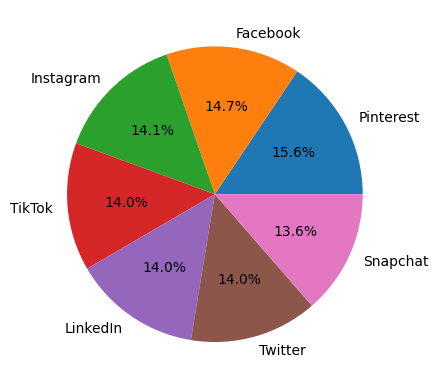

In [ ]:
# Pie chart of the social media apps
sizes = social['App'].value_counts()
labels = social['App'].unique()
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.show()


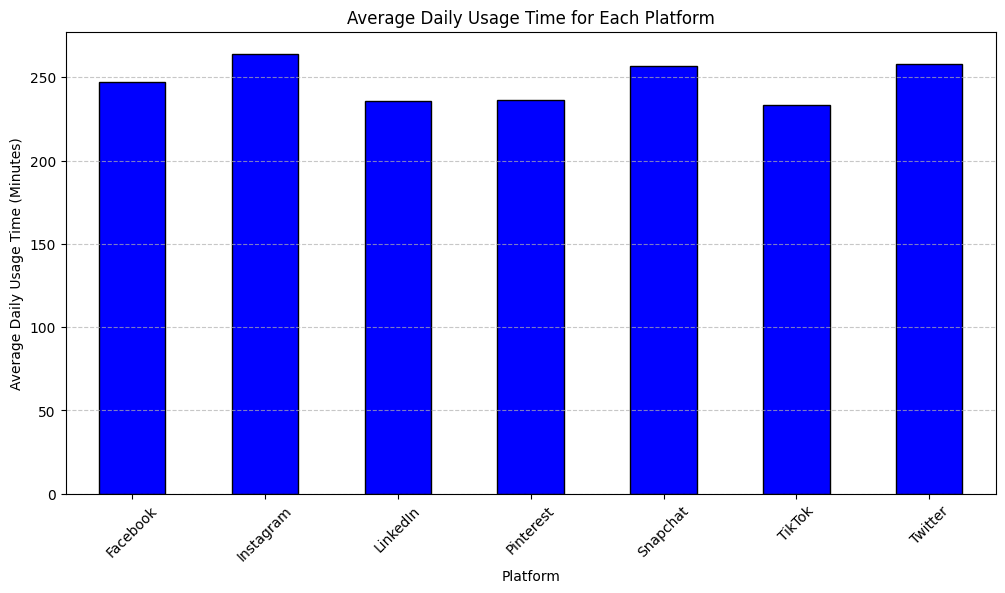

In [17]:
# Calculate the average daily usage time for each platform
average_daily_usage = social.groupby('App')['Daily_Minutes_Spent'].mean()

# Find the platform with the maximum average daily usage time
most_popular_platform = average_daily_usage.idxmax()
most_popular_platform, average_daily_usage[most_popular_platform]

# visualize the average daily usage time for each platform
average_daily_usage.plot(kind='bar', figsize=(12, 6), color='blue', edgecolor='black')
plt.title('Average Daily Usage Time for Each Platform')
plt.xlabel('Platform')
plt.ylabel('Average Daily Usage Time (Minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Are there any platforms with significantly lower usage?

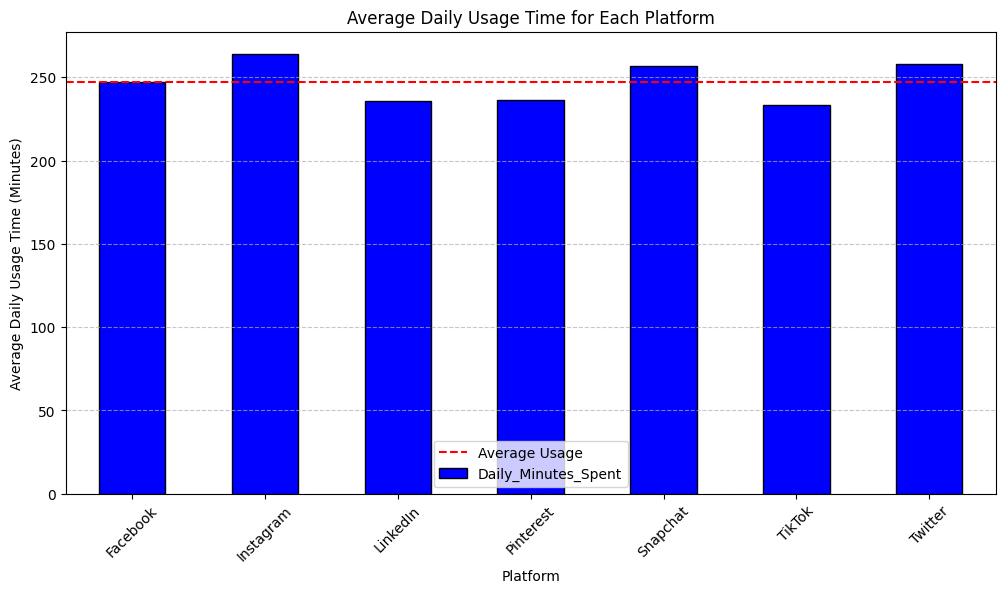

In [18]:
# Visualize platforms with significantly lower usage
average_daily_usage.plot(kind='bar', figsize=(12, 6), color='blue', edgecolor='black')
plt.title('Average Daily Usage Time for Each Platform')
plt.xlabel('Platform')
plt.ylabel('Average Daily Usage Time (Minutes)')
plt.xticks(rotation=45)
plt.axhline(y=average_daily_usage.mean(), color='r', linestyle='--', label='Average Usage')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# User Engagement
Is there a relationship between the number of posts a user makes and their engagement rate?

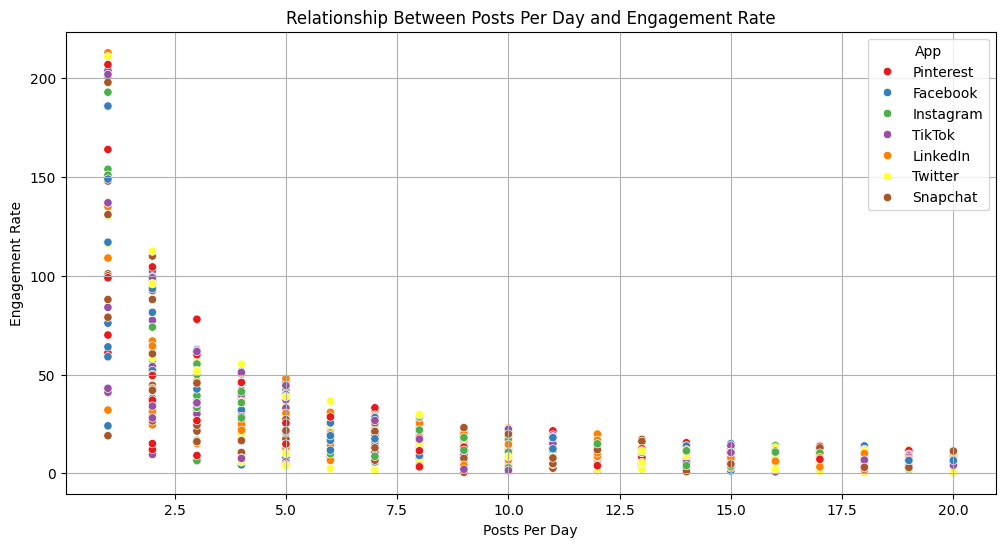

In [19]:
# Calculate engagement rate as (Likes_Per_Day + Follows_Per_Day) / Posts_Per_Day
social['Engagement_Rate'] = (social['Likes_Per_Day'] + social['Follows_Per_Day']) / social['Posts_Per_Day']

# Plot the relationship between Posts_Per_Day and Engagement_Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(data=social, x='Posts_Per_Day', y='Engagement_Rate', hue='App', palette='Set1')
plt.title('Relationship Between Posts Per Day and Engagement Rate')
plt.xlabel('Posts Per Day')
plt.ylabel('Engagement Rate')
plt.legend(title='App')
plt.grid(True)
plt.show()

Which platform has the highest average engagement rate? Does this align with the number of
posts made on that platform?


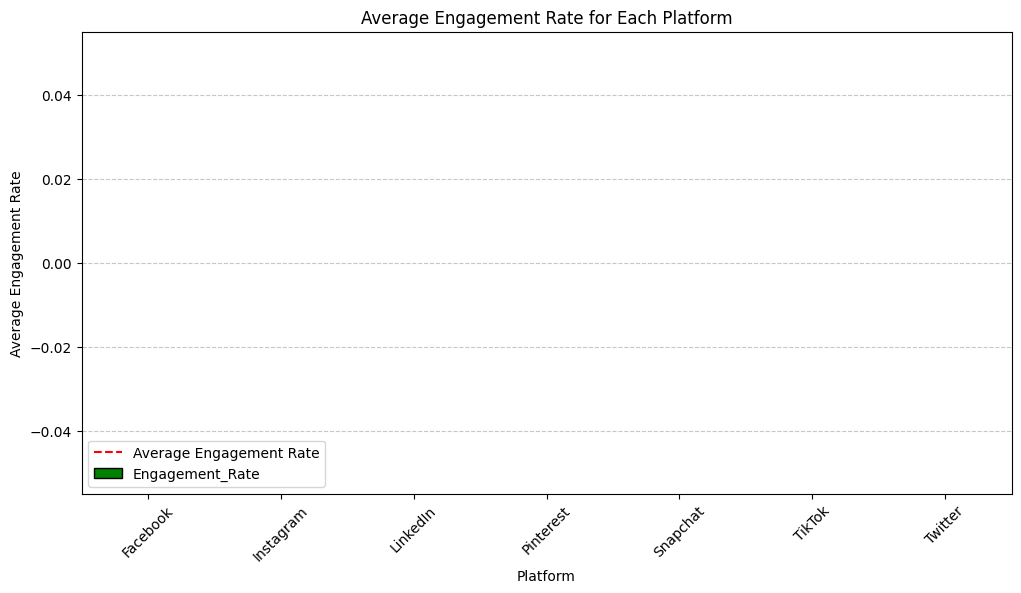

The platform with the highest average engagement rate is Facebook with an average engagement rate of inf


In [20]:
# Calculate the average engagement rate for each platform
average_engagement_rate = social.groupby('App')['Engagement_Rate'].mean()

# Find the platform with the highest average engagement rate
highest_engagement_platform = average_engagement_rate.idxmax()

# Visualize the average engagement rate for each platform
plt.figure(figsize=(12, 6))
average_engagement_rate.plot(kind='bar', color='green', edgecolor='black')
plt.title('Average Engagement Rate for Each Platform')
plt.xlabel('Platform')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.axhline(y=average_engagement_rate.mean(), color='r', linestyle='--', label='Average Engagement Rate')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the platform with the highest average engagement rate
print(f"The platform with the highest average engagement rate is {highest_engagement_platform} with an average engagement rate of {average_engagement_rate[highest_engagement_platform]:.2f}")